# K-means Clustering: Vinho Verde Red Wine

## Import Packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

## Load Data

In [59]:
wine = pd.read_csv('/Users/autumnheyman/Desktop/WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Data Wrangling

### Recode Column Names to Remove Spacing

In [60]:
wine.rename(columns={'volatile acidity' : 'volatile_acidity'}, inplace=True)
wine.head()

,fixed acidity,volatile_acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Recode the Quality Column into Bins

In [61]:
def quality_recode(series):
    if series == 3:
        return 0
    if series == 4: 
        return 0
    if series == 5:
        return 1
    if series == 6: 
        return 1
    if series == 7:
        return 2
    if series == 8: 
        return 2
   

wine['qualityR'] = wine['quality'].apply(quality_recode)

In [62]:
wine.head()

,fixed acidity,volatile_acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,qualityR
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,1


### Conversion of Units (from grams to milligrams): Volatile Acidity, Chlorides

In [63]:
wine['volatile_acidityR'] = wine['volatile_acidity']*1000

In [64]:
wine['chloridesR'] = wine['chlorides']*1000

### Remove Unnecessary Columns

In [65]:
wineTrimmed = wine[['volatile_acidity', 'volatile_acidityR', 'chlorides','chloridesR','density','pH','quality', 'qualityR']]
wineTrimmed.head()

,volatile_acidity,volatile_acidityR,chlorides,chloridesR,density,pH,quality,qualityR
0,0.70,700.0,0.076,76.0,0.9978,3.51,5,1
1,0.88,880.0,0.098,98.0,0.9968,3.20,5,1
2,0.76,760.0,0.092,92.0,0.9970,3.26,5,1
3,0.28,280.0,0.075,75.0,0.9980,3.16,6,1
4,0.70,700.0,0.076,76.0,0.9978,3.51,5,1


### Check Column/Variable Format

In [66]:
wineTrimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   volatile_acidity   1143 non-null   float64
 1   volatile_acidityR  1143 non-null   float64
 2   chlorides          1143 non-null   float64
 3   chloridesR         1143 non-null   float64
 4   density            1143 non-null   float64
 5   pH                 1143 non-null   float64
 6   quality            1143 non-null   int64  
 7   qualityR           1143 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 71.6 KB


## Perform k-Means

In [67]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(wineTrimmed)

KMeans(n_clusters=2)

## Utilize k-Means

### Volatile Acidity vs. Quality

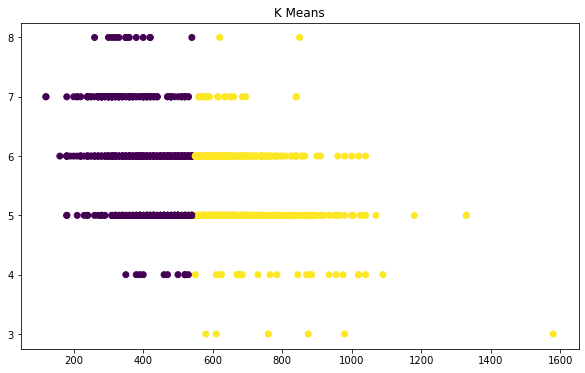

In [68]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(wineTrimmed['volatile_acidityR'],wineTrimmed['quality'],c=kmeans.labels_) 

In [69]:
wineTrimmed['Category'] = kmeans.labels_
wineTrimmed.head()

/var/folders/_4/hlm1ckzd3rxdwwlqs88l366w0000gn/T/ipykernel_40704/2009570460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wineTrimmed['Category'] = kmeans.labels_


,volatile_acidity,volatile_acidityR,chlorides,chloridesR,density,pH,quality,qualityR,Category
0,0.70,700.0,0.076,76.0,0.9978,3.51,5,1,1
1,0.88,880.0,0.098,98.0,0.9968,3.20,5,1,1
2,0.76,760.0,0.092,92.0,0.9970,3.26,5,1,1
3,0.28,280.0,0.075,75.0,0.9980,3.16,6,1,0
4,0.70,700.0,0.076,76.0,0.9978,3.51,5,1,1


In [70]:
wineTrimmed.Category.value_counts()

0    620
1    523
Name: Category, dtype: int64

In [71]:
wineTrimmed.groupby('Category')['volatile_acidityR'].mean()

Category
0    400.258065
1    686.730402
Name: volatile_acidityR, dtype: float64

### Chlorides vs. Quality

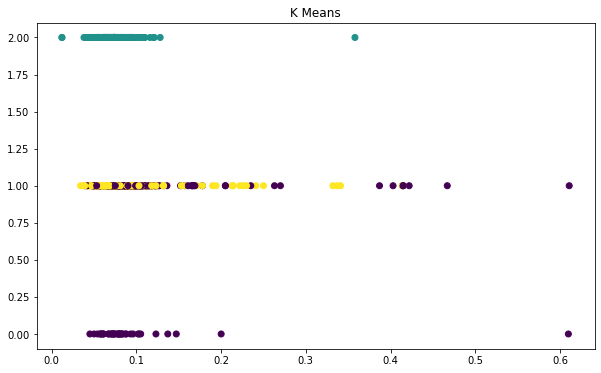

In [54]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(wineTrimmed['chlorides'],wineTrimmed['qualityR'],c=kmeans.labels_)

### pH vs. Quality

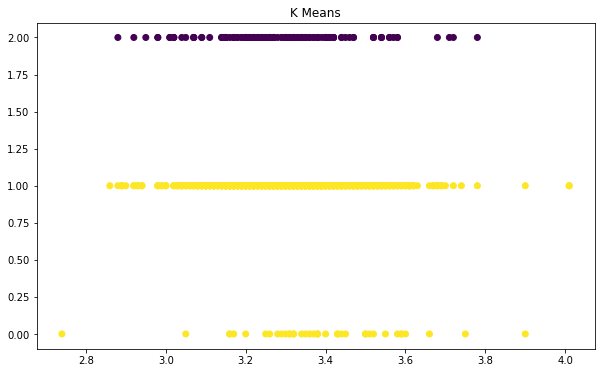

In [44]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(wineTrimmed['pH'],wineTrimmed['qualityR'],c=kmeans.labels_)

### Density vs. Quality

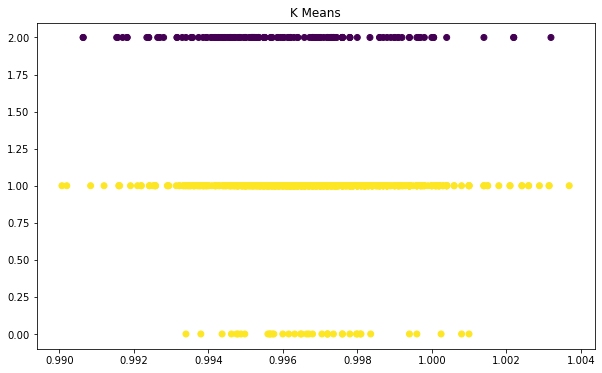

In [45]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(wineTrimmed['density'],wineTrimmed['qualityR'],c=kmeans.labels_)